# Breast cancer prediction (Logistic Gradient Descent)

#### First, we import the necessary libraries for data processing.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import copy
import math

#### Load the diabetes dataset from scikit-learn and visualize its features and target.

In [11]:
from sklearn.datasets import load_breast_cancer

X_train, y_train = load_breast_cancer(as_frame=True, return_X_y=True)
print(f"X_train \n {X_train.head()} \n")
print(f"y_train \n {y_train.head()}")

X_train 
    mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0 

#### Plot the data to see what’s happening in the dataset.

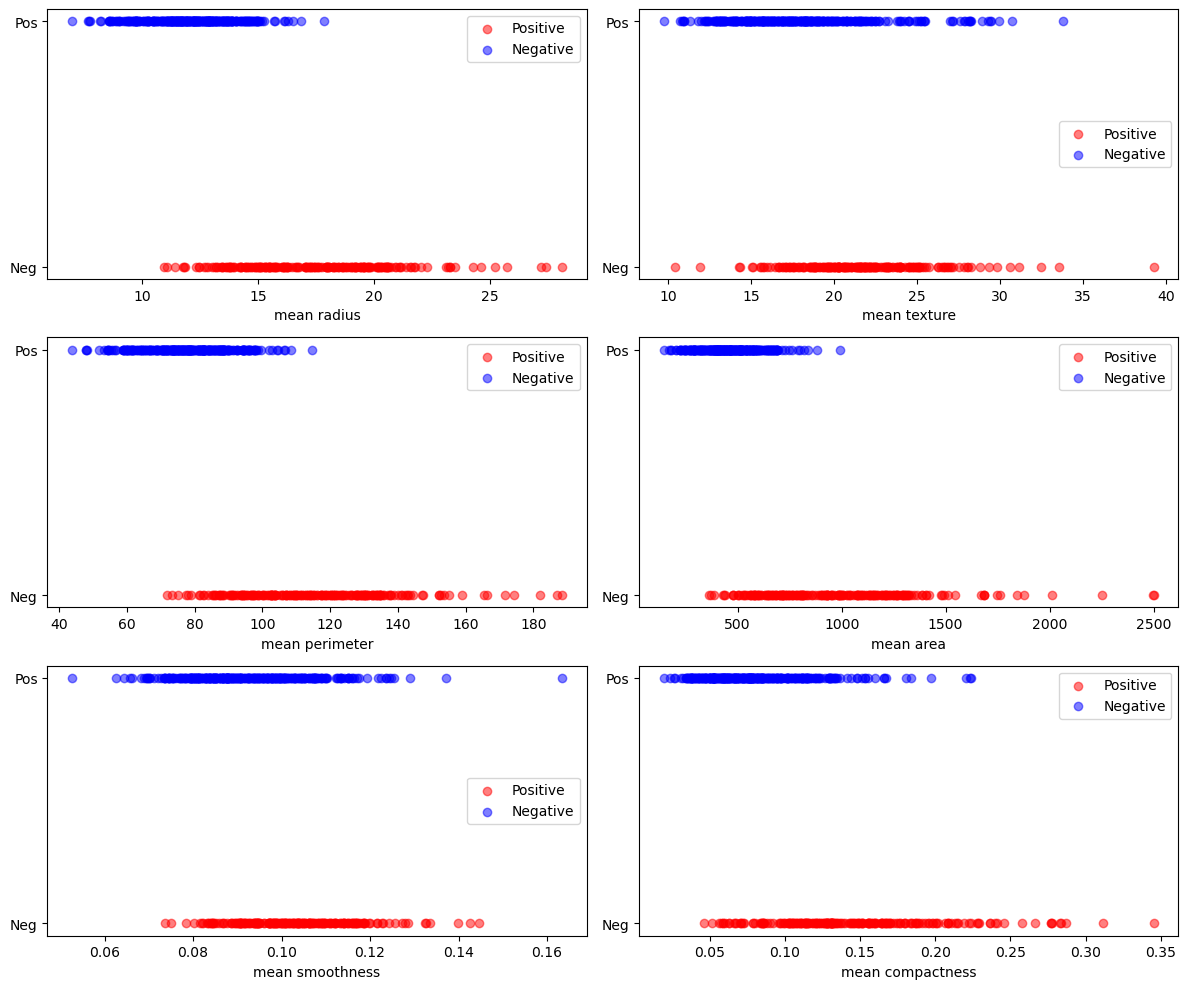

In [31]:
features = ["mean radius", "mean texture", "mean perimeter", "mean area", "mean smoothness", "mean compactness"]

fig, ax = plt.subplots(3, 2, figsize=(12, 10))  # 3 filas x 2 columnas
ax = ax.flatten()

for i, feature in enumerate(features):
    ax[i].scatter(
        X_train.loc[y_train == 0, feature],
        [0]*sum(y_train==0),
        color='red',
        label='Positive',
        alpha=0.5
    )
    ax[i].scatter(
        X_train.loc[y_train == 1, feature],
        [1]*sum(y_train==1),
        color='blue',
        label='Negative',
        alpha=0.5
    )
    ax[i].set_xlabel(feature)
    ax[i].set_yticks([0,1])
    ax[i].set_yticklabels(['Neg', 'Pos'])
    ax[i].legend()

plt.tight_layout()
plt.show()

#### Definition of the sigmoid function

In [13]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Definition of the cost for logistic regresion

In [14]:
def compute_logistic_cost(X, y, w, b):
    
    m = X.shape[0]
    cost = 0.0
    
    for i in range(m):
        z_i = np.dot(X[i],w) + b  
        f_wb_i = sigmoid(z_i)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) *  np.log(1 - f_wb_i)
        
    cost /= m
    return cost   

#### Definition of the gradient for logistic regresion

In [15]:
def compute_logistic_gradient(X, y, w, b):
    
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0

    for i in range(m):
        err = sigmoid(np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err

    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

#### Definition of the gradient descent algorithm for logistic regresion

In [26]:
def logistic_gradient_descent(X, y, w_in, b_in, num_iters, alpha5):
    
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_logistic_gradient(X, y, w, b)
        
        w -= alpha * dj_dw
        b -= alpha * dj_db
        
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {compute_logistic_cost(X, y, w, b):8.2f}")
    
    return w, b

#### Now we run the gradient descent algorithm

In [27]:
initial_w = np.zeros(X_train.shape[1])
initial_b = 0.0
iterations = 10000
alpha = 1e-5

w_final, b_final = logistic_gradient_descent(X_train.values, y_train.values, initial_w, initial_b, iterations, alpha)

Iteration    0: Cost     0.76
Iteration 1000: Cost     0.26
Iteration 2000: Cost     0.23
Iteration 3000: Cost     0.22
Iteration 4000: Cost     0.21
Iteration 5000: Cost     0.21
Iteration 6000: Cost     0.21
Iteration 7000: Cost     0.20
Iteration 8000: Cost     0.20
Iteration 9000: Cost     0.20


#### Definition of prediction function

In [28]:
def predict(X, w, b, threshold=0.5):

    f_wb = sigmoid(np.dot(X, w) + b)  # probabilidades
    predictions = (f_wb >= threshold).astype(int)
    
    return predictions

#### Finally, we calculate the error of the prediction model.

In [29]:
y_pred_train = predict(X_train, w_final, b_final)
print(f"Error percent: {(np.mean(y_pred_train != y_train) * 100):.2f}%")

Error percent: 7.73%
